<a href="https://colab.research.google.com/github/ishgirwan/omdena_hdi/blob/master/karnataka_hdi_dw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data wrangling of Karnataka HDI data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install tabula-py
#import tabula

# Read pdf into list of DataFrame
#df = tabula.read_pdf("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", pages='all')
#tabula.convert_into("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", "/content/drive/My Drive/omdena/karnataka_hdi.csv", output_format="csv", pages='all')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/karnataka_hdi.csv")

In [ ]:
df.head()

,District,Taluk,Gram Panchayat,Village,Standard of\rliving index,Rank,Health\rIndex,Rank.1,Education\rIndex,Rank.2,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.69966,1.0,1.00000,1.0,0.60993,4796.0,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.69553,2.0,0.97289,22344.0,0.61509,3765.0,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.49102,76.0,1.00000,1.0,0.81767,2.0,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.63767,3.0,1.00000,1.0,0.59298,8643.0,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.62548,5.0,1.00000,1.0,0.60343,6110.0,0.72268,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
living index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [ ]:
df = df.rename(columns={'Education\rIndex': 'Education_Index', 'Health\rIndex': 'Health_Index', 'Standard of\rliving index': 'Standard_of_living_index' })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
 4   Standard_of_living_index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
 6   Health_Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
 8   Education_Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
count,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,13537.998892,0.990887,4476.054700,0.565508,13520.742678,0.406786,13537.999040
std,7816.023177,0.029470,9279.955049,0.049246,7844.352578,0.106000,7816.023077
min,1.000000,0.238490,1.000000,0.001560,1.000000,0.003700,1.000000
25%,6769.500000,1.000000,1.000000,0.540910,6769.500000,0.341950,6769.500000
50%,13538.000000,1.000000,1.000000,0.573840,13538.000000,0.419730,13538.000000
75%,20306.500000,1.000000,1.000000,0.600645,20306.000000,0.480575,20306.500000
max,27075.000000,1.000000,27075.000000,0.957010,27075.000000,0.752870,27075.000000


In [ ]:
df.Village.value_counts()

Hosahalli              98
Kodihalli              47
Siddapura              39
Kurubarahalli          36
Honnenahalli           36
                       ..
Rupanagudi              1
Bilkerur                1
Muttige\r(gunjagod)     1
Kombinakai              1
Adakatahalli            1
Name: Village, Length: 20581, dtype: int64

There are several villages with same names.

In [ ]:
df.loc[(df.District == 'Bengaluru Rural') & (df.Village == 'Hosahalli')]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
1827,Bengaluru Rural,Nelamangala,Honnenahalli,Hosahalli,0.27055,2273.0,1.0,1.0,0.60920,4946.0,0.54828,1828.0
4751,Bengaluru Rural,Devanahalli,Bijjawara,Hosahalli,0.20297,6158.0,1.0,1.0,0.62446,1237.0,0.50232,4752.0
23654,Bengaluru Rural,Devanahalli,Bettakote,Hosahalli,0.04614,23039.0,1.0,1.0,0.48854,25350.0,0.28249,23655.0
26798,Bengaluru Rural,Nelamangala,Soladevanahalli,Hosahalli,0.00234,26829.0,1.0,1.0,0.61045,4667.0,0.11260,26799.0


In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Chamarajanagar', 'Bagalkot', 'Haveri', 'Koppal', 'Bidar',
       'Kalaburagi', 'Vijayapura', 'Yadgir', 'Raichur', nan], dtype=object)

In [ ]:
df.loc[df['District'].isnull()]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
27074,NaN,NaN,NaN,Chikkathekalavat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27075,NaN,NaN,NaN,NaN,0.00003,27067.0,1.0,1.0,0.00198,27068.0,0.0037,27075.0


In [ ]:
df = df[df['District'].notna()]

In [ ]:
df['District'].isnull().values.any()

False

In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Chamarajanagar', 'Bagalkot', 'Haveri', 'Koppal', 'Bidar',
       'Kalaburagi', 'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [ ]:
df['District'].nunique()

31

In [ ]:
df['District'].replace('Chamarajanagar', 'Chamarajanagara', inplace=True);

In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Bagalkot', 'Haveri', 'Koppal', 'Bidar', 'Kalaburagi',
       'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [ ]:
df['District'].nunique()

30

In [ ]:
df['HDI'].isnull().values.any()

True

In [ ]:
df.loc[df['HDI'].isnull()]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
27076,Chitradurga,Hosadurga,Chikkabyladakere,ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['HDI'].notna()]

In [ ]:
df['HDI'].isnull().values.any()

False

In [ ]:
df['Taluk'].isnull().values.any()

False

In [ ]:
df['Gram Panchayat'].isnull().values.any()

False

In [ ]:
df.isnull().values.any()

False

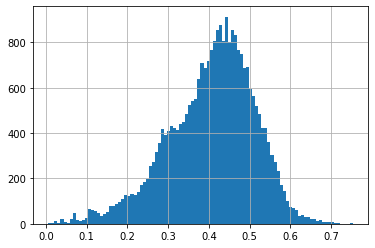

In [ ]:
hdi_hist = df['HDI'].hist(bins=100)

The HDI data distribution looks like a normal distribution.

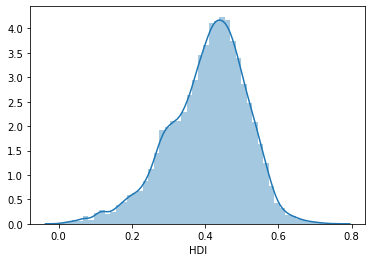

In [ ]:
sns.distplot(df['HDI']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27074 non-null  object 
 1   Taluk                     27074 non-null  object 
 2   Gram Panchayat            27074 non-null  object 
 3   Village                   27074 non-null  object 
 4   Standard_of_living_index  27074 non-null  object 
 5   Rank                      27074 non-null  float64
 6   Health_Index              27074 non-null  float64
 7   Rank.1                    27074 non-null  float64
 8   Education_Index           27074 non-null  float64
 9   Rank.2                    27074 non-null  float64
 10  HDI                       27074 non-null  float64
 11  Rank.3                    27074 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.7+ MB


In [ ]:
cols = [4,5,6,7,8,9]
df.drop(df.columns[cols], axis =1, inplace=True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.72268,5.0
5,Bengaluru Urban,Bengaluru North,Madanayakanahalli,Kadaranahalli,0.72218,6.0
6,Bengaluru Urban,Anekal,Vanakanahalli,Menasiganahalli,0.72205,7.0
7,Bengaluru Urban,Bengaluru North,Huskur,Huskur,0.72088,8.0
8,Bengaluru Urban,Bengaluru South,Nelaguli,Naganayakanaha\rlli,0.71940,9.0
9,Bengaluru Urban,Bengaluru South,Chikkana halli,Sulivara,0.71499,10.0


In [ ]:
df.replace(" ","", inplace=True, regex=True)

In [ ]:
df.replace("\r","", inplace=True, regex=True)

In [ ]:
df.head(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
0,BengaluruUrban,BengaluruNorth,Arakere,Arakere,0.75287,1.0
1,BengaluruUrban,BengaluruNorth,Vaderahalli,Shamarajpura,0.74663,2.0
2,BengaluruUrban,BengaluruNorth,Kasagattapura,Kasagattapura,0.73772,3.0
3,BengaluruUrban,BengaluruNorth,Adakamaranahalli,Makali,0.72313,4.0
4,BengaluruUrban,BengaluruNorth,Shivakote,Kalenahalli,0.72268,5.0
5,BengaluruUrban,BengaluruNorth,Madanayakanahalli,Kadaranahalli,0.72218,6.0
6,BengaluruUrban,Anekal,Vanakanahalli,Menasiganahalli,0.72205,7.0
7,BengaluruUrban,BengaluruNorth,Huskur,Huskur,0.72088,8.0
8,BengaluruUrban,BengaluruSouth,Nelaguli,Naganayakanahalli,0.71940,9.0
9,BengaluruUrban,BengaluruSouth,Chikkanahalli,Sulivara,0.71499,10.0


In [ ]:
df['Taluk'].nunique()

176

In [ ]:
df['Taluk'].unique()

array(['BengaluruNorth', 'Anekal', 'BengaluruSouth', 'Hospet',
       'BengaluruEast', 'Mangaluru', 'Karwar', 'Doddaballapur',
       'Shivamogga', 'Belagavi', 'Somvarpet', 'Mudigere', 'Sirsi',
       'Bangarapet', 'Channapatna', 'Mysuru', 'Udupi', 'Devanahalli',
       'Kundapura', 'Nelamangala', 'Virajpet', 'Ramanagara', 'Hosanagara',
       'Madikere', 'Siddapur', 'Holalkere', 'Shrirangapattana', 'Hassan',
       'Tumakuru', 'Karkal', 'Hunsur', 'Bhatkal', 'Hiriyur',
       'Chikkamagalur', 'Heggadadevankote', 'Sorab', 'Sakleshpur',
       'Malur', 'Bantval', 'Sulya', 'Tirumakudal-Narsip', 'Harihar',
       'Sagar', 'Nanjangud', 'Tirthahalli', 'Davanagere', 'Bagepalli',
       'Yellapur', 'Hosakote', 'Beltangadi', 'Hubli', 'Koppa', 'Gubbi',
       'Malavalli', 'Arkalgud', 'Magadi', 'Chikkaballapura', 'Dharwad',
       'Puttur', 'Jagalur', 'Maddur', 'Gauribidanur', 'Tarikere',
       'Krishnarajpet', 'Kanakapura', 'Koratagere', 'Bhadravati',
       'Piriyapatna', 'Krishnarajanagara', 

In [ ]:
df['Gram Panchayat'].nunique()

5574

In [ ]:
df['Gram Panchayat'].unique()

array(['Arakere', 'Vaderahalli', 'Kasagattapura', ...,
       'Notunderanypanchayat', 'Maidala', 'Gadinadforest'], dtype=object)

In [ ]:
#df[['Gram Panchayat','gp_extra_info']] = df['Gram Panchayat'].str.split('(',expand=True)
#df['Gram Panchayat'].str.replace(r"\(.*\)","", inplace=True)
df.replace(r"\(.*\)","", inplace=True, regex=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
df.sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
5675,BengaluruRural,Hosakote,Jadigenahalli,Kurubaragollahalli,0.49211,5676.0
13965,Kalaburagi,Chincholi,Siroli,Rudnoor,0.41591,13966.0
21569,Yadgir,Yadgir,Saidapur,Balched,0.32024,21570.0
10746,Chikkamagalur,Chikkamagalur,Kadavanthi,Basapura,0.44399,10747.0
791,Chikkamagalur,Chikkamagalur,Allampura,Karadihallikaval,0.57720,792.0


In [ ]:
# convert to csv
df.to_csv('/content/drive/My Drive/omdena/cleaned_karnataka_hdi.csv', index=False, header=True)

NameError: ignored

In [ ]:
df_cleaned = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/cleaned_karnataka_hdi.csv")

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
df_cleaned['District'].unique()

array(['BengaluruUrban', 'Ballari', 'DakshinaKannada', 'UttaraKannada',
       'BengaluruRural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Bagalkot', 'Haveri', 'Koppal', 'Bidar', 'Kalaburagi',
       'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [ ]:
df_cleaned['District'].nunique()

30

In [ ]:
#df_cleaned['Taluk'].unique()

In [ ]:
df_cleaned['Taluk'].nunique()

176

In [ ]:
df_cleaned['Gram Panchayat'].unique()

array(['Arakere', 'Vaderahalli', 'Kasagattapura', ...,
       'Notunderanypanchayat', 'Maidala', 'Gadinadforest'], dtype=object)

In [ ]:
df_cleaned['Gram Panchayat'].nunique()

5543

In [ ]:
df_cleaned.sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
6244,BengaluruUrban,BengaluruSouth,Ramohalli,Chalaghatta,0.48576,6245.0
9606,Tumakuru,Tiptur,Karadi,Ramenahalli,0.45425,9607.0
26478,Chikkaballapura,Sidlaghatta,Sdevaganahalli,Neralemaradahalli,0.15897,26479.0
1215,UttaraKannada,Siddapur,Shiralgi,Shiralgi,0.56303,1216.0
11147,Belagavi,Bilahongal,DODAWAD,DODAWAD,0.44080,11148.0


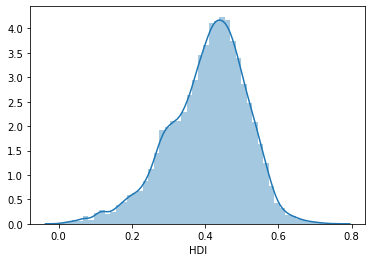

In [ ]:
sns.distplot(df_cleaned['HDI']);

In [ ]:
df_cleaned['Village'].nunique()

20221

In [ ]:
df_codes = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/gram_panchayat.csv", sep=';')

In [ ]:
df_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328 entries, 0 to 34327
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  34328 non-null  int64  
 1   District Name(in English)      34328 non-null  object 
 2   District Census Code2011       34328 non-null  int64  
 3   District Census Code 2001      34328 non-null  int64  
 4   Sub District Code              34328 non-null  int64  
 5   Sub District Name(in English)  34328 non-null  object 
 6   Sub District Census Code 2011  34328 non-null  int64  
 7   Sub District Census Code 2001  31602 non-null  float64
 8   Village Code                   34328 non-null  int64  
 9   Village Name(in English)       34328 non-null  object 
 10  Village Census Code 2011       34328 non-null  int64  
 11  Village Census Code 2001       29446 non-null  float64
 12  Local Body Code                32616 non-null 

In [ ]:
df_codes.head(5)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English)
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL
1,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598647,Agasarakoppa,598647,151600.0,215158.0,HULIGERI
2,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598713,Aladakatti,598713,158200.0,215173.0,MUTALGERI
3,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598724,Alur .S.K.,598724,159300.0,273085.0,ALUR-SK
4,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598769,Anantagiri,598769,163800.0,215157.0,HOSUR


In [ ]:
df_codes['District Name(in English)'].unique()

array(['BAGALKOTE', 'BALLARI', 'BELAGAVI', 'BENGALURU RURAL',
       'BENGALURU URBAN', 'BIDAR', 'CHAMARAJANAGARA', 'CHIKKABALLAPURA',
       'CHIKKAMAGALURU', 'CHITRADURGA', 'DAKSHINA KANNADA', 'DAVANGERE',
       'DHARWAD', 'GADAG', 'HASSAN', 'HAVERI', 'KALABURAGI', 'KODAGU',
       'KOLAR', 'KOPPAL', 'MANDYA', 'MYSURU', 'RAICHUR', 'RAMANAGARA',
       'SHIVAMOGGA', 'TUMAKURU', 'UDUPI', 'UTTARA KANNADA', 'VIJAYAPURA',
       'YADGIR'], dtype=object)

In [ ]:
df_codes['District Name(in English)'].nunique()

30

In [ ]:
#df_codes['Sub District Name(in English)'].unique()

In [ ]:
df_codes['Sub District Name(in English)'].nunique()

227

In [ ]:
df_codes['District Code'].unique()

array([524, 528, 527, 526, 525, 529, 531, 630, 532, 533, 534, 535, 536,
       537, 539, 540, 538, 541, 542, 543, 544, 545, 546, 631, 547, 548,
       549, 550, 530, 635])

In [ ]:
df_codes['District Census Code2011'].unique()

array([556, 565, 555, 583, 572, 558, 578, 582, 570, 566, 575, 567, 562,
       561, 574, 564, 579, 576, 581, 560, 573, 577, 559, 584, 568, 571,
       569, 563, 557, 580])

In [ ]:
#cols = [0,3,4,7,8,11,12]
#df_codes.drop(df_codes.columns[cols], axis=1, inplace=True);

In [ ]:
df_codes.isnull().values.any()

True

In [ ]:
(df_codes['District Census Code2011'] == 0).value_counts()

False    34328
Name: District Census Code2011, dtype: int64

In [ ]:
(df_codes['Village Census Code 2011'] == 0).value_counts()

False    29523
True      4805
Name: Village Census Code 2011, dtype: int64

In [ ]:
(df_codes['Village Code'] == 0).value_counts()

False    34328
Name: Village Code, dtype: int64

In [ ]:
(df_codes['Sub District Census Code 2011'] == 0).value_counts()

False    31602
True      2726
Name: Sub District Census Code 2011, dtype: int64

In [ ]:
(df_codes['Sub District Code'] == 0).value_counts()

False    34328
Name: Sub District Code, dtype: int64

In [ ]:
df_codes['unique code'] = '29'+ df_codes['District Census Code2011'].map(str) + '0' + df_codes['Sub District Code'].map(str) + df_codes['Village Code'].map(str)

In [ ]:
df_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328 entries, 0 to 34327
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  34328 non-null  int64  
 1   District Name(in English)      34328 non-null  object 
 2   District Census Code2011       34328 non-null  int64  
 3   District Census Code 2001      34328 non-null  int64  
 4   Sub District Code              34328 non-null  int64  
 5   Sub District Name(in English)  34328 non-null  object 
 6   Sub District Census Code 2011  34328 non-null  int64  
 7   Sub District Census Code 2001  31602 non-null  float64
 8   Village Code                   34328 non-null  int64  
 9   Village Name(in English)       34328 non-null  object 
 10  Village Census Code 2011       34328 non-null  int64  
 11  Village Census Code 2001       29446 non-null  float64
 12  Local Body Code                32616 non-null 

In [ ]:
df_codes.sample(5)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
24993,546,RAICHUR,559,6,5460,Devadurga,5460,2.0,600563,Mukanhal,600563,485100.0,273065.0,AMARAPUR,2955905460600563
33373,530,VIJAYAPURA,557,3,7072,KOLHAR,0,NaN,599457,Asangi (B.K.),599457,231100.0,216487.0,MALAGHAN,2955707072599457
4794,525,BENGALURU URBAN,572,20,5542,Bengaluru North,5542,1.0,939407,AKKITHIMMANAHALLI,0,NaN,NaN,NaN,2957205542939407
1373,528,BALLARI,565,12,5501,Sandur,5501,6.0,605024,Chikkantapur,605024,929000.0,216247.0,ANTHAPURA,2956505501605024
6160,529,BIDAR,558,5,7086,HULSOOR,0,NaN,599735,Gadiraipalli,599735,402600.0,216338.0,DHANURA (K),2955807086599735


In [ ]:
df_codes['unique code'].isnull().values.any()

False

In [ ]:
df_codes[df_codes['unique code'].duplicated(keep=False)]

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
18797,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618050,Aruvath0Klu,618050,2751900.0,218728.0,ARUVATOKLU,2957605568618050
18798,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618050,Aruvath0Klu,618050,2751900.0,218757.0,PONNAMPET,2957605568618050
18850,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618054,Halligattu,618054,2752300.0,218728.0,ARUVATOKLU,2957605568618054
18851,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618054,Halligattu,618054,2752300.0,218757.0,PONNAMPET,2957605568618054
26606,631,RAMANAGARA,584,21,5605,Magadi,5605,5.0,625784,Thippasandra,625784,2207000.0,215548.0,BELAGUMBA,2958405605625784
26607,631,RAMANAGARA,584,21,5605,Magadi,5605,5.0,625784,Thippasandra,625784,2207000.0,215574.0,THJPPASANDRA,2958405605625784


In [ ]:
#df_codes.drop_duplicates(subset=['unique code'], inplace=True)

In [ ]:
df_codes['Local Body Code'].nunique()

6008

In [ ]:
#cols = [0,2,3,4,6,7,8,10,11,12]
#df_codes.drop(df_codes.columns[cols], axis=1, inplace=True);

In [ ]:
df_codes.sort_values(by=['District Name(in English)', 'Local Body Name(in English)', 'Village Name(in English)'], inplace=True)

In [ ]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL,2955605446598748
7,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598750,Badami (Rural) *,598750,161900.0,215148.0,ADAGAL,2955605446598750
52,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598749,Kabbalageri,598749,161800.0,215148.0,ADAGAL,2955605446598749
544,524,BAGALKOTE,556,2,5443,Jamkhandi,5443,1.0,598464,Adihudi,598464,133300.0,273113.0,ADIHUDI,2955605443598464
545,524,BAGALKOTE,556,2,5443,Jamkhandi,5443,1.0,598433,Alagur,598433,130200.0,215254.0,ALGUR,2955605443598433


In [ ]:
df_codes.replace(" ","", inplace=True, regex=True)

In [ ]:
df_codes.replace(r"\(.*\)","", inplace=True, regex=True)

In [ ]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL,2955605446598748
7,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598750,Badami*,598750,161900.0,215148.0,ADAGAL,2955605446598750
52,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598749,Kabbalageri,598749,161800.0,215148.0,ADAGAL,2955605446598749
544,524,BAGALKOTE,556,2,5443,Jamkhandi,5443,1.0,598464,Adihudi,598464,133300.0,273113.0,ADIHUDI,2955605443598464
545,524,BAGALKOTE,556,2,5443,Jamkhandi,5443,1.0,598433,Alagur,598433,130200.0,215254.0,ALGUR,2955605443598433


In [ ]:
df_codes['District Name(in English)'] = df_codes['District Name(in English)'].str.lower();
df_codes['Sub District Name(in English)'] = df_codes['Sub District Name(in English)'].str.lower();
df_codes['Village Name(in English)'] = df_codes['Village Name(in English)'].str.lower();
df_codes['Local Body Name(in English)'] = df_codes['Local Body Name(in English)'].str.lower();

In [ ]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,bagalkote,556,2,5446,badami,5446,4.0,598748,adagal,598748,161700.0,215148.0,adagal,2955605446598748
7,524,bagalkote,556,2,5446,badami,5446,4.0,598750,badami*,598750,161900.0,215148.0,adagal,2955605446598750
52,524,bagalkote,556,2,5446,badami,5446,4.0,598749,kabbalageri,598749,161800.0,215148.0,adagal,2955605446598749
544,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598464,adihudi,598464,133300.0,273113.0,adihudi,2955605443598464
545,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598433,alagur,598433,130200.0,215254.0,algur,2955605443598433


In [ ]:
df_cleaned.sort_values(by=['District', 'Gram Panchayat', 'Village'], inplace=True)

In [ ]:
df_cleaned.head()

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
17161,Bagalkot,Badami,Adagal,Adagal,0.38380,17162.0
23678,Bagalkot,Badami,Adagal,Badami*,0.28203,23679.0
19769,Bagalkot,Badami,Adagal,Kabbalageri,0.35019,19770.0
19110,Bagalkot,Jamkhandi,Adihudi,Adihudi,0.35949,19111.0
13451,Bagalkot,Jamkhandi,Algur,Alagur,0.42051,13452.0


In [ ]:
df_cleaned['District'] = df_cleaned['District'].str.lower();
df_cleaned['Taluk'] = df_cleaned['Taluk'].str.lower();
df_cleaned['Village'] = df_cleaned['Village'].str.lower();
df_cleaned['Gram Panchayat'] = df_cleaned['Gram Panchayat'].str.lower();

In [ ]:
df_cleaned.head()

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
17161,bagalkot,badami,adagal,adagal,0.38380,17162.0
23678,bagalkot,badami,adagal,badami*,0.28203,23679.0
19769,bagalkot,badami,adagal,kabbalageri,0.35019,19770.0
19110,bagalkot,jamkhandi,adihudi,adihudi,0.35949,19111.0
13451,bagalkot,jamkhandi,algur,alagur,0.42051,13452.0


In [ ]:
df_codes['District Name(in English)'].unique() == df_cleaned['District'].unique()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
df_codes['District Name(in English)'].unique()

array(['bagalkote', 'ballari', 'belagavi', 'bengalururural',
       'bengaluruurban', 'bidar', 'chamarajanagara', 'chikkaballapura',
       'chikkamagaluru', 'chitradurga', 'dakshinakannada', 'davangere',
       'dharwad', 'gadag', 'hassan', 'haveri', 'kalaburagi', 'kodagu',
       'kolar', 'koppal', 'mandya', 'mysuru', 'raichur', 'ramanagara',
       'shivamogga', 'tumakuru', 'udupi', 'uttarakannada', 'vijayapura',
       'yadgir'], dtype=object)

In [ ]:
df_cleaned['District'].unique()

array(['bagalkot', 'ballari', 'belagavi', 'bengalururural',
       'bengaluruurban', 'bidar', 'chamarajanagara', 'chikkaballapura',
       'chikkamagalur', 'chitradurga', 'dakshinakannada', 'davanagere',
       'dharwad', 'gadag', 'hassan', 'haveri', 'kalaburagi', 'kodagu',
       'kolar', 'koppal', 'mandya', 'mysuru', 'raichur', 'ramanagara',
       'shivamogga', 'tumakuru', 'udupi', 'uttarakannada', 'vijayapura',
       'yadgir'], dtype=object)

In [ ]:
df_cleaned['District'].replace({'bagalkot':'bagalkote', 'chikkamagalur':'chikkamagaluru'}, inplace=True)

In [ ]:
df_codes['District Name(in English)'].replace({'davangere':'davanagere'}, inplace=True)

In [ ]:
df_codes['District Name(in English)'].unique() == df_cleaned['District'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
df_codes['Village Name(in English)'].count()

34328

In [ ]:
df_codes['Village Name(in English)'].nunique()

25703

In [ ]:
df_codes['freq'] = df_codes.groupby(by='Village Name(in English)')['Village Name(in English)'].transform('count')

In [ ]:
(df_codes['freq'] == 1).value_counts()

True     22310
False    12018
Name: freq, dtype: int64

In [ ]:
df_codes['freq'].value_counts()

1      22310
2       4022
3       1800
4       1032
5        695
6        558
8        368
9        324
7        315
10       280
12       228
11       209
23       184
14       182
19       152
13       143
20       140
114      114
22       110
18       108
27       108
31        93
16        80
26        78
39        78
24        72
17        68
54        54
51        51
25        50
15        45
44        44
21        42
36        36
35        35
33        33
30        30
29        29
28        28
Name: freq, dtype: int64

In [ ]:
df_cleaned['Village'].nunique()

20007

In [ ]:
df_cleaned['freq'] = df_cleaned.groupby(by='Village')['Village'].transform('count')

In [ ]:
(df_cleaned['freq'] == 1).value_counts()

True     17186
False     9888
Name: freq, dtype: int64

In [ ]:
df_cleaned['freq'].value_counts(())

1     17186
2      3270
3      1593
4       900
5       540
6       414
7       413
8       304
9       270
17      170
10      170
13      169
16      144
12      144
11      143
15      105
20      100
99       99
24       96
23       92
18       90
21       84
36       72
19       57
14       56
26       52
47       47
22       44
39       39
38       38
32       32
31       31
30       30
28       28
27       27
25       25
Name: freq, dtype: int64

In [ ]:
df_codes['Local Body Name(in English)'].nunique()

5463

In [ ]:
df_cleaned['Gram Panchayat'].nunique()

5492

In [ ]:
#!pip install fuzzywuzzy[speedup]

In [ ]:
from fuzzywuzzy import process, fuzz

In [ ]:
df_codes['concat'] = df_codes['District Name(in English)'] + " " + df_codes['Local Body Name(in English)'] + " " + df_codes['Village Name(in English)']

In [ ]:
df_codes.sample(5)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code,freq,concat
31949,550,uttarakannada,563,10,5480,haliyal,5480,3.0,602770,satmani,602770,705300.0,220617.0,yadoga,2956305480602770,1,uttarakannada yadoga satmani
33426,530,vijayapura,557,3,5453,muddebihal,5453,5.0,599585,dhavalagi,599585,243900.0,216605.0,dhavalagi,2955705453599585,1,vijayapura dhavalagi dhavalagi
5946,529,bidar,558,5,5457,bidar,5457,4.0,600158,dattankeri,600158,444900.0,216416.0,gadgi,2955805457600158,2,bidar gadgi dattankeri
26984,547,shivamogga,568,15,5518,hosanagara,5518,4.0,608036,anadagadoduru,608036,1229000.0,219875.0,andagadhudhuru,2956805518608036,1,shivamogga andagadhudhuru anadagadoduru
18514,541,kodagu,576,25,5567,somvarpet,5567,2.0,923975,chikkabetageri,0,NaN,218701.0,guddehosur,2957605567923975,1,kodagu guddehosur chikkabetageri


In [ ]:
df_cleaned['concat'] = df_cleaned['District'] + " " + df_cleaned['Gram Panchayat'] + " " + df_cleaned['Village']

In [ ]:
df_cleaned.sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq,concat
4913,mandya,malavalli,thalagavadi,thalagavadi,0.50052,4914.0,1,mandya thalagavadi thalagavadi
20255,gadag,ron,shantageri,shantageri,0.34257,20256.0,1,gadag shantageri shantageri
10887,chikkaballapura,chintamani,kagathi,amanikeelukuntekere,0.44283,10888.0,1,chikkaballapura kagathi amanikeelukuntekere
20064,davanagere,channagiri,kanchiganal,haralakatta,0.34541,20065.0,2,davanagere kanchiganal haralakatta
19632,koppal,yelburga,kudrimoti,bhairnaikanhalli,0.35260,19633.0,1,koppal kudrimoti bhairnaikanhalli


In [ ]:
df_codes['concat'].isnull().values.any()

True

In [ ]:
df_codes = df_codes[df_codes['concat'].notna()]

In [ ]:
df_cleaned['concat'].isnull().values.any()

False

In [ ]:
import string

punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))

df_codes['concat'] = '|'.join(df_codes['concat'].tolist()).translate(transtab).split('|')
df_cleaned['concat'] = '|'.join(df_cleaned['concat'].tolist()).translate(transtab).split('|')

In [ ]:
df_cleaned.head(10)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq,concat
17161,bagalkote,badami,adagal,adagal,0.38380,17162.0,1,bagalkote adagal adagal
23678,bagalkote,badami,adagal,badami*,0.28203,23679.0,1,bagalkote adagal badami
19769,bagalkote,badami,adagal,kabbalageri,0.35019,19770.0,1,bagalkote adagal kabbalageri
19110,bagalkote,jamkhandi,adihudi,adihudi,0.35949,19111.0,1,bagalkote adihudi adihudi
13451,bagalkote,jamkhandi,algur,alagur,0.42051,13452.0,1,bagalkote algur alagur
21321,bagalkote,badami,alur.s.k.,alur.s.k.,0.32455,21322.0,1,bagalkote alursk alursk
21227,bagalkote,badami,alur.s.k.,beeranur,0.32641,21228.0,1,bagalkote alursk beeranur
10843,bagalkote,badami,alur.s.k.,govanakoppa,0.44324,10844.0,2,bagalkote alursk govanakoppa
26001,bagalkote,badami,alur.s.k.,haganur,0.19630,26002.0,1,bagalkote alursk haganur
25277,bagalkote,badami,alur.s.k.,talakawad,0.23577,25278.0,1,bagalkote alursk talakawad


In [ ]:
df_cleaned['freq'] = df_cleaned.groupby(by='concat')['concat'].transform('count')

In [ ]:
(df_cleaned['freq'] == 1).value_counts()

True     26740
False      334
Name: freq, dtype: int64

In [ ]:
df_cleaned['freq'].value_counts()

1    26740
2      316
3       18
Name: freq, dtype: int64

In [ ]:
df_cleaned.loc[df_cleaned['freq'] != 1]

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq,concat
17614,bagalkote,badami,hosur,hosur,0.37876,17615.0,2,bagalkote hosur hosur
19215,bagalkote,bagalkot,hosur,hosur,0.35797,19216.0,2,bagalkote hosur hosur
5660,bagalkote,mudhol,laxanatti,jalikatti,0.49231,5661.0,2,bagalkote laxanatti jalikatti
6337,bagalkote,mudhol,laxanatti,jalikatti,0.48484,6338.0,2,bagalkote laxanatti jalikatti
9018,bagalkote,bilgi,nagaral,nagaral,0.45951,9019.0,2,bagalkote nagaral nagaral
...,...,...,...,...,...,...,...,...
23928,yadgir,shorapur,mallab,malla,0.27679,23929.0,2,yadgir mallab malla
15620,yadgir,shorapur,mudnoor,mudnoor,0.40018,15621.0,2,yadgir mudnoor mudnoor
15816,yadgir,shorapur,mudnoor,mudnoor,0.39802,15817.0,2,yadgir mudnoor mudnoor
26329,yadgir,yadgir,notunderanypanchayat,yadgir,0.17308,26330.0,2,yadgir notunderanypanchayat yadgir


In [ ]:
df_cleaned = df_cleaned[df_cleaned['freq'] == 1]

In [ ]:
df_cleaned['freq'].value_counts()

1    26740
Name: freq, dtype: int64

In [ ]:
df_codes.head(10)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code,freq,concat
0,524,bagalkote,556,2,5446,badami,5446,4.0,598748,adagal,598748,161700.0,215148.0,adagal,2955605446598748,1,bagalkote adagal adagal
7,524,bagalkote,556,2,5446,badami,5446,4.0,598750,badami*,598750,161900.0,215148.0,adagal,2955605446598750,1,bagalkote adagal badami
52,524,bagalkote,556,2,5446,badami,5446,4.0,598749,kabbalageri,598749,161800.0,215148.0,adagal,2955605446598749,1,bagalkote adagal kabbalageri
544,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598464,adihudi,598464,133300.0,273113.0,adihudi,2955605443598464,1,bagalkote adihudi adihudi
545,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598433,alagur,598433,130200.0,215254.0,algur,2955605443598433,1,bagalkote algur alagur
3,524,bagalkote,556,2,5446,badami,5446,4.0,598724,alur.s.k.,598724,159300.0,273085.0,alur-sk,2955605446598724,1,bagalkote alursk alursk
11,524,bagalkote,556,2,5446,badami,5446,4.0,598726,beeranur,598726,159500.0,273085.0,alur-sk,2955605446598726,1,bagalkote alursk beeranur
29,524,bagalkote,556,2,5446,badami,5446,4.0,598727,govanakoppa,598727,159600.0,273085.0,alur-sk,2955605446598727,3,bagalkote alursk govanakoppa
32,524,bagalkote,556,2,5446,badami,5446,4.0,598723,haganur,598723,159200.0,273085.0,alur-sk,2955605446598723,1,bagalkote alursk haganur
105,524,bagalkote,556,2,5446,badami,5446,4.0,598725,talakawad,598725,159400.0,273085.0,alur-sk,2955605446598725,1,bagalkote alursk talakawad


In [ ]:
df_codes['freq'] = df_codes.groupby(by='concat')['concat'].transform('count')
(df_codes['freq'] == 1).value_counts()

True     32335
False      281
Name: freq, dtype: int64

In [ ]:
df_codes['freq'].value_counts()

1    32335
2      272
3        9
Name: freq, dtype: int64

In [ ]:
df_codes.loc[df_codes['freq'] != 1]

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code,freq,concat
617,524,bagalkote,556,2,5445,mudhol,5445,3.0,598580,chinchakhandi,598580,144900.0,215288.0,chinchakhandik.d.,2955605445598580,2,bagalkote chinchakhandikd chinchakhandi
618,524,bagalkote,556,2,5445,mudhol,5445,3.0,598581,chinchakhandi,598581,145000.0,215288.0,chinchakhandik.d.,2955605445598581,2,bagalkote chinchakhandikd chinchakhandi
45,524,bagalkote,556,2,5446,badami,5446,4.0,598753,hosur,598753,162200.0,215157.0,hosur,2955605446598753,2,bagalkote hosur hosur
164,524,bagalkote,556,2,5447,bagalkot,5447,5.0,598830,hosur,598830,169900.0,273096.0,hosur,2955605447598830,2,bagalkote hosur hosur
629,524,bagalkote,556,2,5445,mudhol,5445,3.0,598616,jalikatti,598616,148500.0,215297.0,laxanatti,2955605445598616,2,bagalkote laxanatti jalikatti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34210,635,yadgir,580,4,7095,wadagera,0,NaN,621204,konkal,621204,382800.0,218105.0,konkal,2958007095621204,2,yadgir konkal konkal
34132,635,yadgir,580,4,5587,shorapur,5587,8.0,620879,malla,620879,349800.0,218147.0,mallab.,2958005587620879,2,yadgir mallab malla
34133,635,yadgir,580,4,5587,shorapur,5587,8.0,620878,malla,620878,349700.0,218147.0,mallab.,2958005587620878,2,yadgir mallab malla
33923,635,yadgir,580,4,7096,hunasagi,0,NaN,620916,mudnoor,620916,353500.0,218149.0,mudanoork,2958007096620916,2,yadgir mudanoork mudnoor


In [ ]:
df_codes = df_codes[df_codes['freq'] == 1]

In [ ]:
df_codes['freq'].value_counts()

1    32335
Name: freq, dtype: int64

In [ ]:
!pip install rapidfuzz

In [ ]:
from rapidfuzz import fuzz
from rapidfuzz import process

In [ ]:
fuzz.ratio('bagalkote alursk alursk', 'bagalkote alursk allursp')

93.61702127659575

In [ ]:
fuzz.partial_ratio('bagalkote alursk allursp', 'bagalkote alursk alursk')

95.65217391304348

In [ ]:
fuzz.token_sort_ratio('alursk alursk', 'alursk allursp')

88.88888888888889

In [ ]:
fuzz.token_set_ratio('alursk alursk', 'alursk allursp')

100.0

In [ ]:
choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
process.extract("new york jets", choices, limit=2)

[('New York Jets', 100.0), ('New York Giants', 78.57142857142857)]

In [ ]:
process.extractOne("new york jets", choices)

('New York Jets', 100.0)

In [ ]:
from tqdm import tqdm
import time

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:

matched_concat = []
similarity = []

for idx, i in tqdm(df_cleaned['concat'].iteritems()):
        
        district_name = df_cleaned['District'].iloc[idx]
        gp_name = df_cleaned['Gram Panchayat'].iloc[idx]
        vil_name = df_cleaned['Village'].iloc[idx]
        ratio = process.extract(i, df_codes['concat'][(df_codes['District Name(in English)'] == district_name)], limit=1, scorer=fuzz.token_sort_ratio)
        matched_concat.append(ratio[0][0])
        similarity.append(ratio[0][1])

df_cleaned['matched_concat'] = pd.Series(matched_concat)
df_cleaned['similarity'] = pd.Series(similarity)

In [ ]:
df_cleaned.head(10)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq,concat,matched_concat,similarity
0,bagalkote,badami,adagal,adagal,0.38380,17162.0,1,bagalkote adagal adagal,bagalkote adagal adagal,100.0
1,bagalkote,badami,adagal,badami*,0.28203,23679.0,1,bagalkote adagal badami,bagalkote adagal badami,100.0
2,bagalkote,badami,adagal,kabbalageri,0.35019,19770.0,1,bagalkote adagal kabbalageri,bagalkote adagal kabbalageri,100.0
3,bagalkote,jamkhandi,adihudi,adihudi,0.35949,19111.0,1,bagalkote adihudi adihudi,bagalkote adihudi adihudi,100.0
4,bagalkote,jamkhandi,algur,alagur,0.42051,13452.0,1,bagalkote algur alagur,bagalkote algur alagur,100.0
5,bagalkote,badami,alur.s.k.,alur.s.k.,0.32455,21322.0,1,bagalkote alursk alursk,bagalkote alursk alursk,100.0
6,bagalkote,badami,alur.s.k.,beeranur,0.32641,21228.0,1,bagalkote alursk beeranur,bagalkote alursk beeranur,100.0
7,bagalkote,badami,alur.s.k.,govanakoppa,0.44324,10844.0,1,bagalkote alursk govanakoppa,bagalkote alursk govanakoppa,100.0
8,bagalkote,badami,alur.s.k.,haganur,0.19630,26002.0,1,bagalkote alursk haganur,bagalkote alursk haganur,100.0
9,bagalkote,badami,alur.s.k.,talakawad,0.23577,25278.0,1,bagalkote alursk talakawad,bagalkote alursk talakawad,100.0


In [ ]:
df_cleaned[(df_cleaned['similarity'] > 90)].nunique()

District             30
Taluk               176
Gram Panchayat     5240
Village           18776
HDI               18179
Rank.3            24907
freq                  1
concat            24922
matched_concat    24779
similarity          163
dtype: int64

In [ ]:
df_new = pd.merge(df_cleaned, df_codes, how='inner', left_on= 'matched_concat', right_on='concat')

In [ ]:
df_new.head()

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq_x,concat_x,matched_concat,similarity,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code,freq_y,concat_y
0,bagalkote,badami,adagal,adagal,0.38380,17162.0,1,bagalkote adagal adagal,bagalkote adagal adagal,100.0,524,bagalkote,556,2,5446,badami,5446,4.0,598748,adagal,598748,161700.0,215148.0,adagal,2955605446598748,1,bagalkote adagal adagal
1,bagalkote,badami,adagal,badami*,0.28203,23679.0,1,bagalkote adagal badami,bagalkote adagal badami,100.0,524,bagalkote,556,2,5446,badami,5446,4.0,598750,badami*,598750,161900.0,215148.0,adagal,2955605446598750,1,bagalkote adagal badami
2,bagalkote,badami,adagal,kabbalageri,0.35019,19770.0,1,bagalkote adagal kabbalageri,bagalkote adagal kabbalageri,100.0,524,bagalkote,556,2,5446,badami,5446,4.0,598749,kabbalageri,598749,161800.0,215148.0,adagal,2955605446598749,1,bagalkote adagal kabbalageri
3,bagalkote,jamkhandi,adihudi,adihudi,0.35949,19111.0,1,bagalkote adihudi adihudi,bagalkote adihudi adihudi,100.0,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598464,adihudi,598464,133300.0,273113.0,adihudi,2955605443598464,1,bagalkote adihudi adihudi
4,bagalkote,jamkhandi,algur,alagur,0.42051,13452.0,1,bagalkote algur alagur,bagalkote algur alagur,100.0,524,bagalkote,556,2,5443,jamkhandi,5443,1.0,598433,alagur,598433,130200.0,215254.0,algur,2955605443598433,1,bagalkote algur alagur


In [ ]:
df_new[(df_new['similarity'] < 80)].sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3,freq_x,concat_x,matched_concat,similarity,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code,freq_y,concat_y
19512,ramanagara,kanakapura,bekuppe,horalagallu,0.39212,16370.0,1,ramanagara bekuppe horalagallu,ramanagara bannikuppe ganakallu,78.688525,631,ramanagara,584,21,5606,ramanagara,5606,0.0,626097,ganakallu,626097,2238300.0,215598.0,bannikuppe,2958405606626097,1,ramanagara bannikuppe ganakallu
12987,kalaburagi,afzalpur,patharaga,ghatterga,0.39400,16201.0,1,kalaburagi patharaga ghatterga,kalaburagi chengta pangarga,77.192982,538,kalaburagi,579,4,7090,kamalapur,0,NaN,620342,pangarga,620342,296300.0,217929.0,chengta,2957907090620342,1,kalaburagi chengta pangarga
20479,shivamogga,hosanagara,chikkajeni,tariga,0.49330,5568.0,1,shivamogga chikkajeni tariga,shivamogga tumari chimale,79.245283,547,shivamogga,568,15,5515,sagar,5515,1.0,607364,chimale,607364,1161800.0,219933.0,tumari,2956805515607364,1,shivamogga tumari chimale
18348,mysuru,tirumakudal-narsip,rkotthegala,madrahalli,0.47763,7047.0,1,mysuru rkotthegala madrahalli,mysuru nallethalapura madanahalli,70.967742,545,mysuru,577,26,5574,nanjangud,5574,6.0,619123,madanahalli,619123,2857800.0,219598.0,nallethalapura,2957705574619123,1,mysuru nallethalapura madanahalli
20794,shivamogga,shivamogga,hosahalli,gajanurumullakere,0.52638,3017.0,1,shivamogga hosahalli gajanurumullakere,shivamogga gajanuru gajanurumullakere,74.666667,547,shivamogga,568,15,5520,shivamogga,5520,6.0,608479,gajanurumullakere,608479,1273300.0,219988.0,gajanuru,2956805520608479,1,shivamogga gajanuru gajanurumullakere


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26740 entries, 0 to 26739
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       26740 non-null  object 
 1   Taluk                          26740 non-null  object 
 2   Gram Panchayat                 26740 non-null  object 
 3   Village                        26740 non-null  object 
 4   HDI                            26740 non-null  float64
 5   Rank.3                         26740 non-null  float64
 6   freq_x                         26740 non-null  int64  
 7   concat_x                       26740 non-null  object 
 8   matched_concat                 26740 non-null  object 
 9   similarity                     26740 non-null  float64
 10  District Code                  26740 non-null  int64  
 11  District Name(in English)      26740 non-null  object 
 12  District Census Code2011       26740 non-null 

In [ ]:
cols = [0,1,2,3,5,6,7,8,10,12,13,14,16,17,18,20,21,22,25,26]
df_new.drop(df_new.columns[cols], axis=1, inplace=True);

In [ ]:
df_new.head()

,HDI,similarity,District Name(in English),Sub District Name(in English),Village Name(in English),Local Body Name(in English),unique code
0,0.38380,100.0,bagalkote,badami,adagal,adagal,2955605446598748
1,0.28203,100.0,bagalkote,badami,badami*,adagal,2955605446598750
2,0.35019,100.0,bagalkote,badami,kabbalageri,adagal,2955605446598749
3,0.35949,100.0,bagalkote,jamkhandi,adihudi,adihudi,2955605443598464
4,0.42051,100.0,bagalkote,jamkhandi,alagur,algur,2955605443598433


In [ ]:
df_new.to_csv('/content/drive/My Drive/omdena_hdi/data/hdi_with_census_codes_v2.csv', index=False, header=True)

In [ ]:
!pip install geopandas

In [7]:
import numpy as np
import geopandas as gpd
import pandas as pd
import glob
import os
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_files = glob.glob('/content/drive/My Drive/omdena_hdi/karnataka_shapefiles/*/*.shp')

In [ ]:
len(all_files)

In [ ]:
li = []

for filename in all_files:
    df = gpd.read_file(filename)
    base = os.path.basename(filename)
    fname = os.path.splitext(base)[0]
    df['district'] = fname
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.to_csv('/content/drive/My Drive/omdena_hdi/data/karnataka_shapefiles.csv', index=False, header=True)

In [5]:
df =  pd.read_csv('/content/drive/My Drive/omdena_hdi/data/karnataka_shapefiles.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32622 entries, 0 to 32621
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KGISVillag  32622 non-null  int64  
 1   KGISVill_1  32622 non-null  int64  
 2   KGISVill_2  32622 non-null  object 
 3   KGISHobliI  32622 non-null  int64  
 4   UniqueVill  32622 non-null  object 
 5   Bhucode     32033 non-null  float64
 6   CensusVill  32622 non-null  int64  
 7   BhoomiVill  31893 non-null  float64
 8   created_us  32622 non-null  object 
 9   created_da  32622 non-null  object 
 10  last_edite  32622 non-null  object 
 11  last_edi_1  32622 non-null  object 
 12  LGDGPCode   31083 non-null  float64
 13  LGDGPCode_  17 non-null     float64
 14  SHAPE_Leng  32622 non-null  float64
 15  SHAPE_Area  32622 non-null  float64
 16  geometry    32622 non-null  object 
 17  district    32622 non-null  object 
dtypes: float64(6), int64(4), object(8)
memory usage: 4.5+ MB


In [6]:
df.head()

,KGISVillag,KGISVill_1,KGISVill_2,KGISHobliI,UniqueVill,Bhucode,CensusVill,BhoomiVill,created_us,created_da,last_edite,last_edi_1,LGDGPCode,LGDGPCode_,SHAPE_Leng,SHAPE_Area,geometry,district
0,25491,2802020027,J.I. Bacchahalli (Nandhi),771,2802020027_1,2.902010e+11,2958205596623614,2.802020e+09,SA,2019-04-23,SA,2019-04-30,218840.0,NaN,1209.556345,8.358910e+04,"POLYGON ((793679.6678450005 1484010.543038, 79...",Chikkaballapura
1,25492,2802020013,Chikkanahalli (Nandhi),771,2802020013_1,2.902010e+11,2958205596623600,2.802020e+09,SA,2019-04-23,SA,2019-04-30,218844.0,NaN,2862.470490,5.111686e+05,"POLYGON ((784472.3145450004 1486596.793238, 78...",Chikkaballapura
2,25493,2802010084,Adavi Gollavarahalli,490,2802010084_1,2.902010e+11,2958205596623568,2.802010e+09,SA,2019-04-23,SA,2019-04-23,218842.0,NaN,7992.379780,3.142050e+06,"POLYGON ((801490.3950450004 1489450.977738, 80...",Chikkaballapura
3,25494,2802010074,Angarekhanahalli,490,2802010074_1,2.902010e+11,2958205596623587,2.802010e+09,SA,2019-04-23,SA,2019-04-23,218826.0,NaN,8293.956576,2.094080e+06,"POLYGON ((806316.7614450004 1489638.926638, 80...",Chikkaballapura
4,25495,2802010017,Ankanagondi,490,2802010017_1,2.902010e+11,2958205596623548,2.802010e+09,SA,2019-04-23,SA,2019-04-23,218845.0,NaN,132.824601,1.047021e+03,"POLYGON ((793075.3392450004 1488631.922438, 79...",Chikkaballapura


In [35]:
df['CensusVill'].nunique()

27823

In [8]:
df_new = pd.read_csv('/content/drive/My Drive/omdena_hdi/data/hdi_with_census_codes_v2.csv')

In [9]:
df_new.head()

,HDI,similarity,District Name(in English),Sub District Name(in English),Village Name(in English),Local Body Name(in English),unique code
0,0.38380,100.0,bagalkote,badami,adagal,adagal,2955605446598748
1,0.28203,100.0,bagalkote,badami,badami*,adagal,2955605446598750
2,0.35019,100.0,bagalkote,badami,kabbalageri,adagal,2955605446598749
3,0.35949,100.0,bagalkote,jamkhandi,adihudi,adihudi,2955605443598464
4,0.42051,100.0,bagalkote,jamkhandi,alagur,algur,2955605443598433


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26740 entries, 0 to 26739
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HDI                            26740 non-null  float64
 1   similarity                     26740 non-null  float64
 2   District Name(in English)      26740 non-null  object 
 3   Sub District Name(in English)  26740 non-null  object 
 4   Village Name(in English)       26740 non-null  object 
 5   Local Body Name(in English)    26740 non-null  object 
 6   unique code                    26740 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [37]:
df_new['unique code'].nunique()

25609

In [38]:
(df_new['similarity'] > 90).count()

26740

In [39]:
df_final = pd.merge(df_new, df, how='inner', left_on= 'unique code', right_on='CensusVill')

In [40]:
df_final.head()

,HDI,similarity,District Name(in English),Sub District Name(in English),Village Name(in English),Local Body Name(in English),unique code,KGISVillag,KGISVill_1,KGISVill_2,KGISHobliI,UniqueVill,Bhucode,CensusVill,BhoomiVill,created_us,created_da,last_edite,last_edi_1,LGDGPCode,LGDGPCode_,SHAPE_Leng,SHAPE_Area,geometry,district
0,0.38380,100.0,bagalkote,badami,adagal,adagal,2955605446598748,3,204010026,Adagal (Balageri),93,0204010026_1,2.040100e+10,2955605446598748,204010026.0,SA,2019-04-23,SA,2019-04-23,215148.0,NaN,22897.571495,1.947310e+07,"POLYGON ((566608.2116450004 1765940.826638, 56...",Bagalkot
1,0.35019,100.0,bagalkote,badami,kabbalageri,adagal,2955605446598749,22,204010035,Kabbalageri,93,0204010035_1,2.040100e+10,2955605446598749,204010035.0,SA,2019-04-23,SA,2019-04-23,215148.0,NaN,15487.910796,1.097218e+07,"POLYGON ((568380.3351450004 1763978.003638, 56...",Bagalkot
2,0.35949,100.0,bagalkote,jamkhandi,adihudi,adihudi,2955605443598464,536,201020017,Adihudi,892,0201020017_1,2.010100e+10,2955605443598464,201020017.0,SA,2019-04-23,SA,2019-04-23,273113.0,NaN,14297.939131,1.133046e+07,"POLYGON ((542850.7316450004 1840982.390038, 54...",Bagalkot
3,0.42051,100.0,bagalkote,jamkhandi,alagur,algur,2955605443598433,486,201010003,Alagura,406,0201010003_1,2.010100e+10,2955605443598433,201010003.0,SA,2019-04-23,SA,2019-04-23,215254.0,NaN,20133.208044,2.126997e+07,"POLYGON ((538953.8338450005 1834576.741838, 53...",Bagalkot
4,0.32455,100.0,bagalkote,badami,alur.s.k.,alur-sk,2955605446598724,116,204040024,Alura S.K.,658,0204040024_1,2.040100e+10,2955605446598724,204040024.0,SA,2019-04-23,SA,2019-04-23,273085.0,NaN,11363.132397,5.636253e+06,"POLYGON ((551238.4974450005 1758804.688138, 55...",Bagalkot


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25823 entries, 0 to 25822
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HDI                            25823 non-null  float64
 1   similarity                     25823 non-null  float64
 2   District Name(in English)      25823 non-null  object 
 3   Sub District Name(in English)  25823 non-null  object 
 4   Village Name(in English)       25823 non-null  object 
 5   Local Body Name(in English)    25823 non-null  object 
 6   unique code                    25823 non-null  int64  
 7   KGISVillag                     25823 non-null  int64  
 8   KGISVill_1                     25823 non-null  int64  
 9   KGISVill_2                     25823 non-null  object 
 10  KGISHobliI                     25823 non-null  int64  
 11  UniqueVill                     25823 non-null  object 
 12  Bhucode                        25385 non-null 

In [42]:
cols = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,24]
df_final.drop(df_final.columns[cols], axis=1, inplace=True);

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25823 entries, 0 to 25822
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HDI                            25823 non-null  float64
 1   similarity                     25823 non-null  float64
 2   District Name(in English)      25823 non-null  object 
 3   Sub District Name(in English)  25823 non-null  object 
 4   Village Name(in English)       25823 non-null  object 
 5   Local Body Name(in English)    25823 non-null  object 
 6   unique code                    25823 non-null  int64  
 7   SHAPE_Leng                     25823 non-null  float64
 8   SHAPE_Area                     25823 non-null  float64
 9   geometry                       25823 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.2+ MB


In [45]:
df_final['unique code'].nunique()

21790

In [51]:
df_final[(df_final['similarity'] > 90)].count()

HDI                              24151
similarity                       24151
District Name(in English)        24151
Sub District Name(in English)    24151
Village Name(in English)         24151
Local Body Name(in English)      24151
unique code                      24151
SHAPE_Leng                       24151
SHAPE_Area                       24151
geometry                         24151
dtype: int64

In [52]:
df_final = df_final[(df_final['similarity'] > 90)]

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24151 entries, 0 to 25822
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HDI                            24151 non-null  float64
 1   similarity                     24151 non-null  float64
 2   District Name(in English)      24151 non-null  object 
 3   Sub District Name(in English)  24151 non-null  object 
 4   Village Name(in English)       24151 non-null  object 
 5   Local Body Name(in English)    24151 non-null  object 
 6   unique code                    24151 non-null  int64  
 7   SHAPE_Leng                     24151 non-null  float64
 8   SHAPE_Area                     24151 non-null  float64
 9   geometry                       24151 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.0+ MB


In [54]:
df_final['unique code'].nunique()

21161

In [55]:
df_final['freq'] = df_final.groupby(by='unique code')['unique code'].transform('count')
(df_final['freq'] == 1).value_counts()

True     18984
False     5167
Name: freq, dtype: int64

In [56]:
df_final['freq'].value_counts()

1     18984
2      3452
3       831
4       420
5       145
6        96
7        56
8        48
10       30
9        27
12       24
23       23
15       15
Name: freq, dtype: int64

In [59]:
df_final[df_final['freq'] == 7]

,HDI,similarity,District Name(in English),Sub District Name(in English),Village Name(in English),Local Body Name(in English),unique code,SHAPE_Leng,SHAPE_Area,geometry,freq
1613,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,1406.045137,2.484415e+04,"POLYGON ((443514.1732450004 1749045.541138, 44...",7
1614,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,627.147752,2.107419e+04,"POLYGON ((443175.2380450005 1749038.984138, 44...",7
1615,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,1177.104345,3.650797e+04,"POLYGON ((443734.8192450004 1749193.205438, 44...",7
1616,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,417.288437,5.849310e+03,"POLYGON ((444321.2014450004 1749197.249138, 44...",7
1617,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,1036.234419,4.874765e+04,"POLYGON ((444436.3906450004 1749791.754938, 44...",7
1618,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,11579.323464,5.858524e+06,"POLYGON ((443991.5782450004 1750493.568038, 44...",7
1619,0.45022,100.000000,belagavi,belagavi,mandoli,mandoli,2955505438597727,16344.927954,3.482625e+06,"POLYGON ((444436.3906450004 1749791.754938, 44...",7
2738,0.41748,98.245614,bengalururural,devanahalli,nallur,nalluru,2958305603625444,2390.405557,1.751938e+05,"POLYGON ((799015.4213450004 1460027.280338, 79...",7
2739,0.41748,98.245614,bengalururural,devanahalli,nallur,nalluru,2958305603625444,354.917481,6.925565e+03,"POLYGON ((798695.5587450005 1460237.830838, 79...",7
2740,0.41748,98.245614,bengalururural,devanahalli,nallur,nalluru,2958305603625444,553.587424,1.974327e+04,"POLYGON ((799531.2698450005 1459529.831238, 79...",7


In [60]:
df_final = df_final[(df_final['freq'] == 1)]

In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 25822
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HDI                            18984 non-null  float64
 1   similarity                     18984 non-null  float64
 2   District Name(in English)      18984 non-null  object 
 3   Sub District Name(in English)  18984 non-null  object 
 4   Village Name(in English)       18984 non-null  object 
 5   Local Body Name(in English)    18984 non-null  object 
 6   unique code                    18984 non-null  int64  
 7   SHAPE_Leng                     18984 non-null  float64
 8   SHAPE_Area                     18984 non-null  float64
 9   geometry                       18984 non-null  object 
 10  freq                           18984 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 1.7+ MB


In [62]:
df_final.isnull().values.any()

False

In [64]:
df_final.head()

,HDI,similarity,District Name(in English),Sub District Name(in English),Village Name(in English),Local Body Name(in English),unique code,SHAPE_Leng,SHAPE_Area,geometry,freq
0,0.38380,100.0,bagalkote,badami,adagal,adagal,2955605446598748,22897.571495,1.947310e+07,"POLYGON ((566608.2116450004 1765940.826638, 56...",1
1,0.35019,100.0,bagalkote,badami,kabbalageri,adagal,2955605446598749,15487.910796,1.097218e+07,"POLYGON ((568380.3351450004 1763978.003638, 56...",1
2,0.35949,100.0,bagalkote,jamkhandi,adihudi,adihudi,2955605443598464,14297.939131,1.133046e+07,"POLYGON ((542850.7316450004 1840982.390038, 54...",1
3,0.42051,100.0,bagalkote,jamkhandi,alagur,algur,2955605443598433,20133.208044,2.126997e+07,"POLYGON ((538953.8338450005 1834576.741838, 53...",1
4,0.32455,100.0,bagalkote,badami,alur.s.k.,alur-sk,2955605446598724,11363.132397,5.636253e+06,"POLYGON ((551238.4974450005 1758804.688138, 55...",1


In [63]:
df_final.to_csv('/content/drive/My Drive/omdena_hdi/data/hdi_with_geometry.csv', index=False, header=True)